In [1]:
%config InlineBackend.figure_format = 'retina'

In [75]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"

# basic imports
import re
import cv2
import random
import time
import scanpy as sc
import pandas as pd
import os, sys
from scipy.stats import zscore
from copy import deepcopy
import numpy as np
from scipy.stats import ranksums
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

In [3]:
sns.set_style('ticks')

In [4]:
def my_vmax(values): 
    return (np.percentile(values, 99)+np.max(values))/2

In [5]:
sdir = '~/decidua/10xVisium'
indir = sdir+'/file/new'
outdir = '~/decidua/10xVisium/plot/new/RPL'

In [6]:
normal_slices = ['A1_N59','B1_N59','C1_N56','D1_N56','C1_N65','D1_N65']
disease_slices = ['B1_P4','C1_P8B','D1_P9T','D1_P9B']

In [8]:
space_dict = {}
for slide in normal_slices+disease_slices:
    space_dict[slide] = sc.read_h5ad(f'{indir}/SPACEL/{slide}.norm_log.h5ad')

In [23]:
df_ls = []
for slide in normal_slices+disease_slices:
    space_data = space_dict[slide]
    exp_df = space_data.to_df()
    exp_df['group'] = space_data.obs['Domain'].map(lambda x:slide+'-'+x)
    df_ls.append(exp_df.groupby('group').mean().T)

In [26]:
exp_df = pd.concat(df_ls, axis=1)

In [71]:
exp_df = exp_df.loc[:,exp_df.columns[exp_df.columns.str.endswith('Domain1')].tolist()+exp_df.columns[exp_df.columns.str.endswith('Domain2')].tolist()]

In [28]:
d1_marker_df = pd.read_csv(f'{indir}/seurat/Domain1_marker.Ctrl_vs_RPL.csv', index_col=0)
d2_marker_df = pd.read_csv(f'{indir}/seurat/Domain2_marker.Ctrl_vs_RPL.csv', index_col=0)

In [110]:
ctrl_d1_up_genes = d1_marker_df[(d1_marker_df['avg_log2FC']>=0.5) & (d1_marker_df['p_val']<1e-10) & (d1_marker_df['cluster']=='Ctrl')].index.tolist()
rpl_d1_up_genes = d1_marker_df[(d1_marker_df['avg_log2FC']>=0.5) & (d1_marker_df['p_val']<1e-10) & (d1_marker_df['cluster']=='RPL')].index.tolist()

In [111]:
ctrl_d2_up_genes = d2_marker_df[(d2_marker_df['avg_log2FC']>=0.5) & (d2_marker_df['p_val']<1e-10) & (d2_marker_df['cluster']=='Ctrl')].index.tolist()
rpl_d2_up_genes = d2_marker_df[(d2_marker_df['avg_log2FC']>=0.5) & (d2_marker_df['p_val']<1e-10) & (d2_marker_df['cluster']=='RPL')].index.tolist()

In [112]:
print(len(ctrl_d1_up_genes), len(rpl_d1_up_genes), len(ctrl_d2_up_genes), len(rpl_d2_up_genes))

129 314 279 417


meta NOT subset; don't know how to subset; dropped


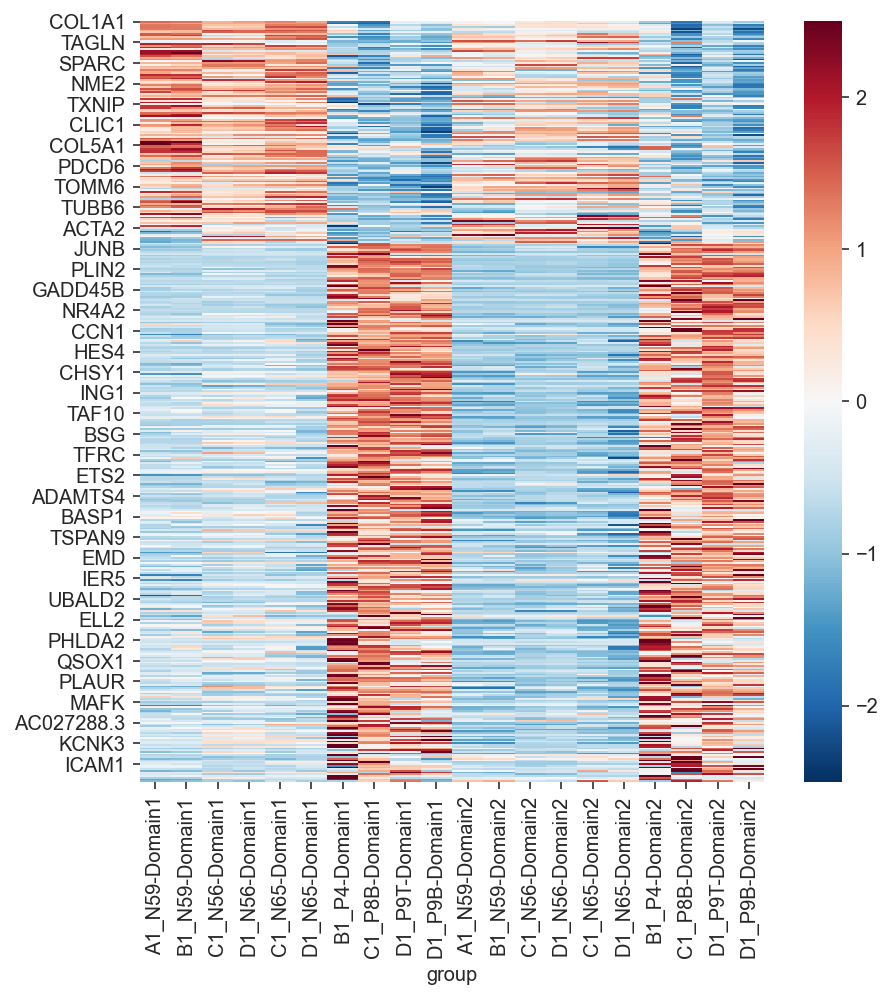

In [113]:
plt.figure(figsize=(7,7))
sns.heatmap(zscore(exp_df.loc[ctrl_d1_up_genes+rpl_d1_up_genes], axis=1), cmap='RdBu_r', 
            vmin=-2.5, vmax=2.5)
plt.savefig(outdir+'/domain1_genes.Ctrl_vs_RPL.heatmap.pdf')

meta NOT subset; don't know how to subset; dropped


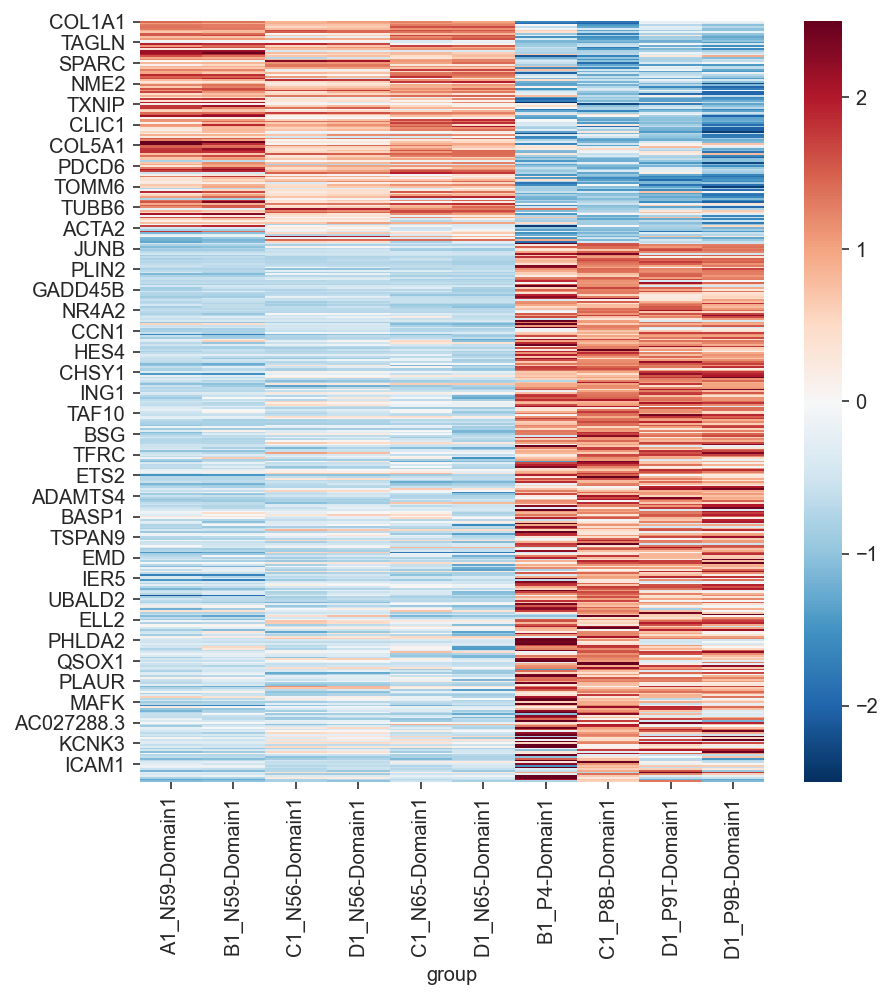

In [121]:
plt.figure(figsize=(7,7))
sns.heatmap(zscore(exp_df.loc[ctrl_d1_up_genes+rpl_d1_up_genes], axis=1).iloc[:,:10], cmap='RdBu_r', 
            vmin=-2.5, vmax=2.5)
plt.savefig(outdir+'/domain1_genes.Ctrl_vs_RPL.heatmap.D1.pdf')

meta NOT subset; don't know how to subset; dropped


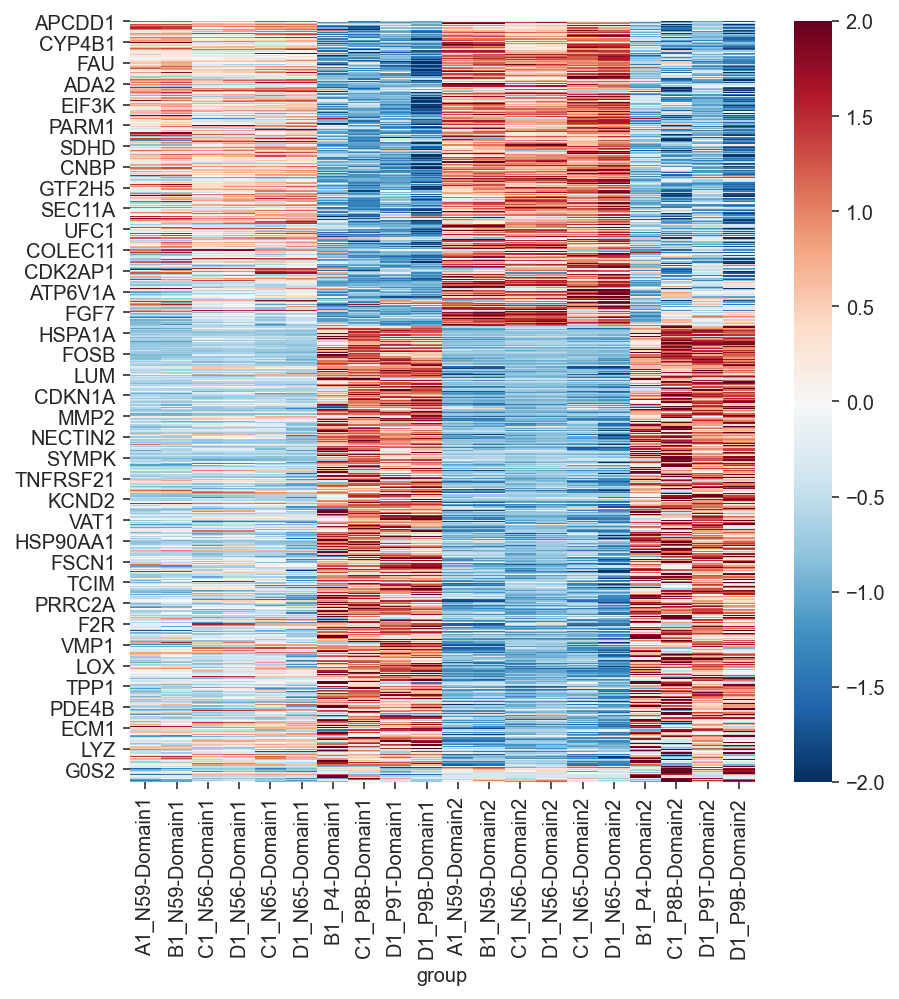

In [114]:
plt.figure(figsize=(7,7))
sns.heatmap(zscore(exp_df.loc[ctrl_d2_up_genes+rpl_d2_up_genes], axis=1), cmap='RdBu_r', 
            vmin=-2, vmax=2)
plt.savefig(outdir+'/domain2_genes.Ctrl_vs_RPL.heatmap.pdf')

meta NOT subset; don't know how to subset; dropped


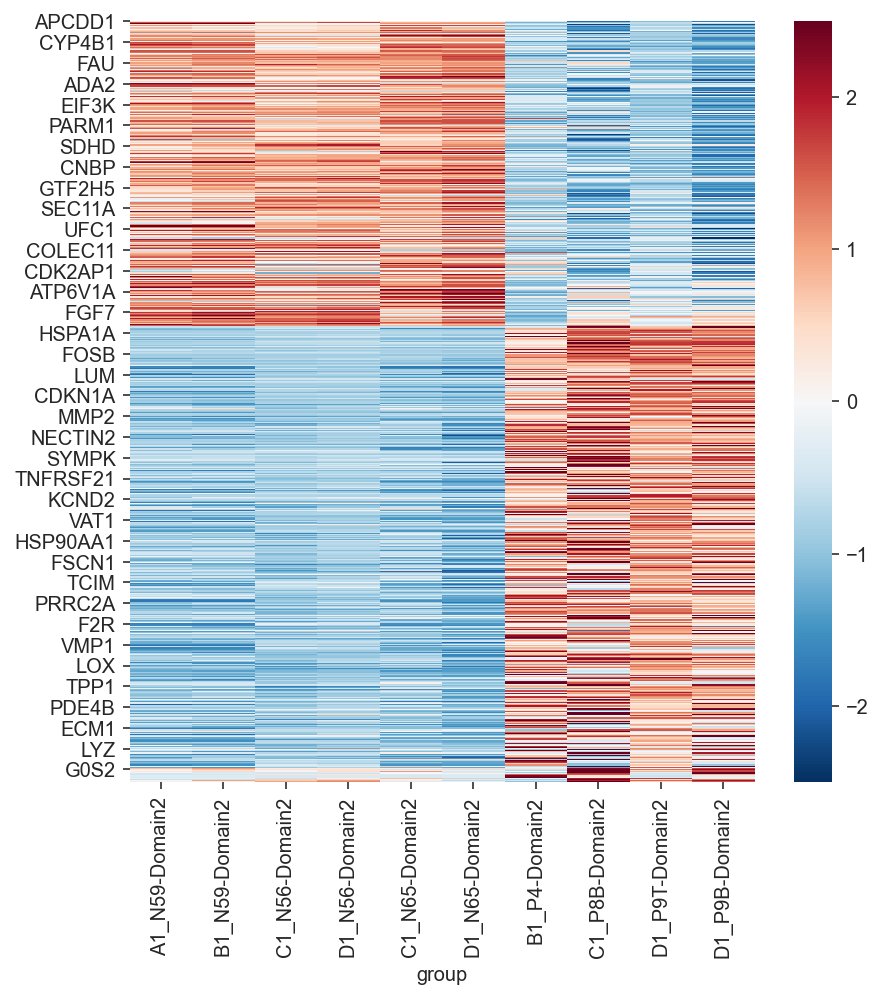

In [123]:
plt.figure(figsize=(7,7))
sns.heatmap(zscore(exp_df.loc[ctrl_d2_up_genes+rpl_d2_up_genes], axis=1).iloc[:,10:], cmap='RdBu_r', 
            vmin=-2.5, vmax=2.5)
plt.savefig(outdir+'/domain2_genes.Ctrl_vs_RPL.heatmap.D2.pdf')